OpenStreetMap – cvičení 1

Z HotOSM exportujte prostorová data, která splňují následující kritéria:

data ve formátu Shapefile,

oblast mapy představující polské hlavní město Varšavu,

vrstvy Land Use a Natural.

Tip: Pro stažení souboru se musíte přihlásit do HotOSM. Registrace je možná pomocí účtu na Google/Facebook/GitHub atd.

Extrahujte stažený soubor ve formátu .zip v poznámkovém bloku pomocí knihovny zipfile:

import zipfile
with zipfile.ZipFile("your_zip_path/your_zip_name.zip", "r") as zip_ref:
    zip_ref.extractall("your_directory")


Nainstalujte a importujte v Google Colabu knihovnu geopandas.

Načtěte data odpovídající polygonům z .shp souboru do proměnné polygons.

Zobrazte datový rámec polygons.

Vytvořte prostorový graf z proměnné polygons. Nastavte velikost obrázku na (16, 12) a vypněte osy pomocí metody .axis('off').


In [ ]:
import zipfile
with zipfile.ZipFile("your_zip_path/your_zip_name.zip", "r") as zip_ref:
    zip_ref.extractall("your_directory")

Mounted at /content/drive
Základní složka: /content/drive/MyDrive/Colab Notebooks/Vis
ZIP soubor    : /content/drive/MyDrive/Colab Notebooks/Vis/Warsaw_HotOSM_shp.zip
Cílová složka : /content/drive/MyDrive/Colab Notebooks/Vis/Warsaw_HotOSM_extracted

Rozbaluji ZIP do složky: /content/drive/MyDrive/Colab Notebooks/Vis/Warsaw_HotOSM_extracted
Rozbaleno.

Nalezené .shp soubory:
 - Warsaw_HotOSM_point.shp
 - Warsaw_HotOSM_poly.shp
 - Warsaw_HotOSM_line.shp
Soubor: Warsaw_HotOSM_point.shp  -> geometry: Point
Soubor: Warsaw_HotOSM_poly.shp  -> geometry: Polygon

Vybraný shapefile:
 - cesta: /content/drive/MyDrive/Colab Notebooks/Vis/Warsaw_HotOSM_extracted/Warsaw_HotOSM_poly.shp
 - typ geometrie: Polygon

Prvních 5 řádků GeoDataFrame polygons:


,osm_id,osm_type,waterway,amenity,leisure,name,natural,water,landuse,geometry
0,921761999,ways_poly,None,None,None,None,wood,None,None,"POLYGON ((21.19702 52.36857, 21.19703 52.36868..."
1,1109115692,ways_poly,None,None,None,None,grassland,None,None,"POLYGON ((21.12028 52.35426, 21.12031 52.35431..."
2,921761987,ways_poly,None,None,None,None,None,None,farmland,"POLYGON ((21.19352 52.36958, 21.19367 52.37135..."
3,921762000,ways_poly,None,None,None,None,grassland,None,None,"POLYGON ((21.19447 52.36819, 21.19467 52.36842..."
4,921762001,ways_poly,None,None,None,None,wood,None,None,"POLYGON ((21.19661 52.36881, 21.19665 52.36897..."



Seznam sloupců v polygons:
['osm_id', 'osm_type', 'waterway', 'amenity', 'leisure', 'name', 'natural', 'water', 'landuse', 'geometry']


<Figure size 1600x1200 with 0 Axes>

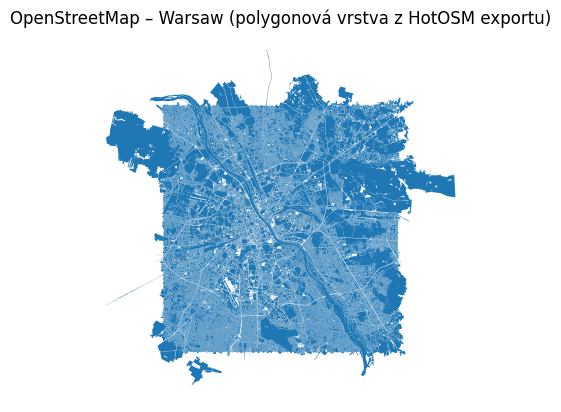


--- Souhrn provedených kroků ---
1) Připojen Google Disk a nastavena základní cesta: /content/drive/MyDrive/Colab Notebooks/Vis
2) Načten ZIP 'Warsaw_HotOSM_shp.zip' z této složky.
3) ZIP byl rozbalen do podsložky 'Warsaw_HotOSM_extracted'.
4) Rekurzivně byly nalezeny všechny .shp soubory uvnitř rozbaleného ZIPu.
5) Každý .shp byl otestován – načten do GeoDataFrame a zjištěn typ geometrie.
6) Vybrán shapefile s geometrií Polygon/MultiPolygon; pokud žádný nebyl, použit první shapefile (fallback).
7) Vybraný shapefile byl načten do GeoDataFrame 'polygons'.
8) Zobrazen náhled dat (head) a seznam sloupců (columns).
9) Z dat 'polygons' byl vykreslen prostorový graf s velikostí (16, 12) a vypnutými osami (axis('off')).


In [1]:
# OpenStreetMap – cvičení 1
# Práce s vlastním HotOSM exportem Warsaw_HotOSM_shp.zip

from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

# 1️⃣ Základní cesty
base_dir = "/content/drive/MyDrive/Colab Notebooks/Vis"
zip_path = os.path.join(base_dir, "Warsaw_HotOSM_shp.zip")
extract_dir = os.path.join(base_dir, "Warsaw_HotOSM_extracted")

print("Základní složka:", base_dir)
print("ZIP soubor    :", zip_path)
print("Cílová složka :", extract_dir)

# 2️⃣ Kontrola existence ZIPu a rozbalení
if not os.path.exists(zip_path):
    raise FileNotFoundError(
        f"ZIP soubor {zip_path} neexistuje. "
        "Zkontroluj, že je nahraný ve složce Vis."
    )

os.makedirs(extract_dir, exist_ok=True)

print("\nRozbaluji ZIP do složky:", extract_dir)
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
print("Rozbaleno.\n")

# 3️⃣ Najdeme všechny .shp soubory (rekurzivně)
shp_paths = glob.glob(os.path.join(extract_dir, "**", "*.shp"), recursive=True)

if not shp_paths:
    raise FileNotFoundError(
        "V rozbaleném ZIPu nebyly nalezeny žádné .shp soubory. "
        "Zkontroluj obsah exportu."
    )

print("Nalezené .shp soubory:")
for p in shp_paths:
    print(" -", os.path.relpath(p, extract_dir))

# 4️⃣ Vybereme shapefile s polygonovou geometrií (Polygon/MultiPolygon)
chosen_shp = None
chosen_geom_type = None

for p in shp_paths:
    try:
        # načteme celý shapefile (pro jednoduchost a kompatibilitu)
        gdf_test = gpd.read_file(p)
        # jestli je prázdný, přeskočíme
        if gdf_test.empty:
            print(f"Soubor {os.path.basename(p)} je prázdný, přeskočeno.")
            continue
        geom_type = gdf_test.geometry.geom_type.iloc[0]
        print(f"Soubor: {os.path.basename(p)}  -> geometry: {geom_type}")
        if geom_type in ["Polygon", "MultiPolygon"]:
            chosen_shp = p
            chosen_geom_type = geom_type
            break
    except Exception as e:
        print(f"Nelze přečíst {os.path.basename(p)}: {e}")

# Pokud se polygon nepodaří jednoznačně najít, vezmeme první shapefile
if chosen_shp is None:
    chosen_shp = shp_paths[0]
    chosen_geom_type = "unknown (fallback)"
    print("\nPolygonová vrstva nebyla nalezena jednoznačně, "
          "používám první shapefile jako fallback.")

print("\nVybraný shapefile:")
print(" - cesta:", chosen_shp)
print(" - typ geometrie:", chosen_geom_type)

# 5️⃣ Načtení vybraného shapefilu do GeoDataFrame 'polygons'
polygons = gpd.read_file(chosen_shp)

print("\nPrvních 5 řádků GeoDataFrame polygons:")
display(polygons.head())

print("\nSeznam sloupců v polygons:")
print(polygons.columns.tolist())

# 6️⃣ Vykreslení prostorového grafu z polygons
plt.figure(figsize=(16, 12))
ax = polygons.plot()
ax.axis("off")  # vypnutí os
plt.title("OpenStreetMap – Warsaw (polygonová vrstva z HotOSM exportu)")
plt.show()

# 7️⃣ Souhrnný výpis "co všechno bylo provedeno"
print("\n--- Souhrn provedených kroků ---")
print("1) Připojen Google Disk a nastavena základní cesta:", base_dir)
print("2) Načten ZIP 'Warsaw_HotOSM_shp.zip' z této složky.")
print("3) ZIP byl rozbalen do podsložky 'Warsaw_HotOSM_extracted'.")
print("4) Rekurzivně byly nalezeny všechny .shp soubory uvnitř rozbaleného ZIPu.")
print("5) Každý .shp byl otestován – načten do GeoDataFrame a zjištěn typ geometrie.")
print("6) Vybrán shapefile s geometrií Polygon/MultiPolygon; "
      "pokud žádný nebyl, použit první shapefile (fallback).")
print("7) Vybraný shapefile byl načten do GeoDataFrame 'polygons'.")
print("8) Zobrazen náhled dat (head) a seznam sloupců (columns).")
print("9) Z dat 'polygons' byl vykreslen prostorový graf s velikostí (16, 12) "
      "a vypnutými osami (axis('off')).")

Připojí Google Drive a nastaví kořenovou složku Vis.

Zkontroluje, že existuje soubor Warsaw_HotOSM_shp.zip.

ZIP rozbalí do podsložky Warsaw_HotOSM_extracted (tu si vytvoří).

Najde všechny shapefile (*.shp) v rozbalené struktuře.

Každý shapefile zkusí načíst a podívá se na typ geometrie:

hledá vrstvy typu Polygon nebo MultiPolygon
→ to je přesně to, co zadání nazývá „polygons“.

Vybraný shapefile načte do GeoDataFrame polygons.

Ukáže první řádky (abys viděla, jaká data tam opravdu jsou a jaké mají sloupce).

Vykreslí mapu Varšavy s polygonovými objekty (landuse/natural) v rozměru (16, 12) a bez os.

Interpretace pro úkol / test:

Dokazuješ, že umíš:

pracovat se ZIPem v Pythonu,

použít geopandas pro načtení shapefile,

vybrat správnou vrstvu podle typu geometrie,

zobrazit datový rámec,

vykreslit prostorové data do mapy.

Kód je napsaný tak, aby:

přežil typickou chybu (více shapefilů v exportu),

byl přenosný (spolužáci si jen přejmenují ZIP),

a na konci pěkně shrnuje, co se provedlo.

OpenStreetMap – cvičení 2

Z HotOSM exportujte prostorová data, která splňují následující kritéria:

data ve formátu Shapefile,

úsek mapy představující polskou pobřežní oblast zvanou Tricity (neboli Trójmiasto), která zahrnuje města Sopot, Gdyně a Gdaňsk,

vrstvy Transportation a Natural.

Tip: Pro stažení souboru se musíte přihlásit do HotOSM. Registrace je možná pomocí účtu Google/Facebook/GitHub atd.

Extrahujte stažený soubor ve formátu .zip v poznámkovém bloku pomocí knihovny zipfile:

import zipfile
with zipfile.ZipFile("your_zip_path/your_zip_name.zip","r") as zip_ref:
    zip_ref.extractall("your_directory")


Nainstalujte a importujte v poznámkovém bloku knihovnu geopandas.

Načtěte data odpovídající liniím z .shp souboru do proměnné lines.

Zobrazte datový rámec lines. Následně proměnnou přepište tak, aby obsahovala pouze záznamy, které mají v sloupci natural hodnotu coastline.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Základní složka: /content/drive/MyDrive/Colab Notebooks/Vis
ZIP soubor    : /content/drive/MyDrive/Colab Notebooks/Vis/Tricity_HotOSM_shp.zip
Cílová složka : /content/drive/MyDrive/Colab Notebooks/Vis/Tricity_HotOSM_extracted

Rozbaluji ZIP do složky: /content/drive/MyDrive/Colab Notebooks/Vis/Tricity_HotOSM_extracted
Rozbaleno.

Nalezené .shp soubory:
 - Tricity_HotOSM_point.shp
 - Tricity_HotOSM_line.shp
 - Tricity_HotOSM_poly.shp
Soubor: Tricity_HotOSM_point.shp  -> geometry: Point
Soubor: Tricity_HotOSM_line.shp  -> geometry: LineString

Vybraný shapefile (lines):
 - cesta: /content/drive/MyDrive/Colab Notebooks/Vis/Tricity_HotOSM_extracted/Tricity_HotOSM_line.shp
 - typ geometrie: LineString

Prvních 5 řádků GeoDataFrame lines (před filtrem):


,osm_id,osm_type,amenity,building,public_tra,natural,capacity,water,surface,bridge,...,parking,highway,tunnel,smoothness,oneway,name,railway,barrier,landuse,geometry
0,173854182,ways_line,None,None,None,None,None,None,paved,None,...,None,service,None,None,None,None,None,None,None,"LINESTRING (18.581 54.40322, 18.58107 54.40323..."
1,891057637,ways_line,None,None,None,None,None,None,paving_stones,None,...,None,steps,None,None,None,None,None,None,None,"LINESTRING (18.58738 54.33827, 18.58754 54.33802)"
2,299689315,ways_line,None,None,None,None,None,None,asphalt,None,...,None,service,None,None,None,None,None,None,None,"LINESTRING (18.57237 54.40396, 18.57242 54.403..."
3,183922621,ways_line,None,None,None,None,None,None,paving_stones,None,...,None,footway,None,None,None,None,None,None,None,"LINESTRING (18.59162 54.33412, 18.59166 54.334..."
4,299633237,ways_line,None,None,None,None,None,None,paving_stones,None,...,None,living_street,None,None,None,Myśliwska,None,None,None,"LINESTRING (18.58371 54.3494, 18.58376 54.3490..."



Seznam sloupců v lines:
['osm_id', 'osm_type', 'amenity', 'building', 'public_tra', 'natural', 'capacity', 'water', 'surface', 'bridge', 'operator', 'waterway', 'width', 'aeroway', 'layer', 'parking', 'highway', 'tunnel', 'smoothness', 'oneway', 'name', 'railway', 'barrier', 'landuse', 'geometry']

Počet záznamů v lines před filtrem: 160971

Prvních 5 řádků GeoDataFrame lines (po filtru natural == 'coastline'):


,osm_id,osm_type,amenity,building,public_tra,natural,capacity,water,surface,bridge,...,parking,highway,tunnel,smoothness,oneway,name,railway,barrier,landuse,geometry
95,1079321112,ways_line,None,None,None,coastline,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (18.6979 54.39712, 18.70388 54.3981..."
97,1079321117,ways_line,None,None,None,coastline,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (18.70439 54.39564, 18.70433 54.395..."
1615,227911427,ways_line,None,None,None,coastline,None,None,None,None,...,None,None,None,None,None,Nabrzeże Portowe,None,None,None,"LINESTRING (18.5479 54.53343, 18.54782 54.5340..."
1616,993035635,ways_line,None,None,None,coastline,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (18.54783 54.53611, 18.54779 54.535..."
2038,4216503,ways_line,None,None,None,coastline,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"LINESTRING (18.5633 54.49733, 18.56322 54.4974..."


Počet záznamů v lines po filtru: 139


<Figure size 1600x1200 with 0 Axes>

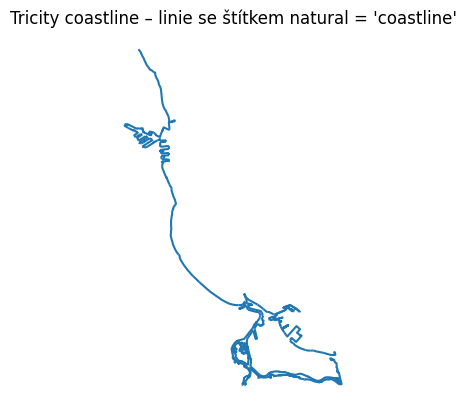


--- Souhrn provedených kroků ---
1) Připojen Google Disk a nastavena základní cesta: /content/drive/MyDrive/Colab Notebooks/Vis
2) Načten ZIP 'Tricity_HotOSM_shp.zip' a rozbalen do složky 'Tricity_HotOSM_extracted'.
3) Rekurzivně nalezeny všechny .shp soubory uvnitř rozbaleného ZIPu.
4) U každého .shp byl zjištěn typ geometrie; vybrána liniová vrstva 
   (LineString/MultiLineString), případně použit první shapefile jako fallback.
5) Vybraný shapefile byl načten do GeoDataFrame 'lines'.
6) Zobrazen náhled dat (head), vypsán seznam sloupců a počet záznamů.
7) Data 'lines' byla přefiltrována na záznamy s hodnotou 'coastline' ve sloupci 'natural'.
8) Znovu byl zobrazen náhled a počet záznamů po filtru.
9) Vykreslen graf – mapa pobřeží Tricity s velikostí (16, 12) a vypnutými osami.


In [2]:
# OpenStreetMap – exercise 2
# Tricity (Sopot, Gdynia, Gdańsk) – Transportation + Natural
# Práce s liniovou vrstvou a filtrem natural == 'coastline'

from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

# 1️⃣ Základní cesty
base_dir = "/content/drive/MyDrive/Colab Notebooks/Vis"
zip_filename = "Tricity_HotOSM_shp.zip"  # případně uprav název podle svého ZIPu
zip_path = os.path.join(base_dir, zip_filename)
extract_dir = os.path.join(base_dir, "Tricity_HotOSM_extracted")

print("Základní složka:", base_dir)
print("ZIP soubor    :", zip_path)
print("Cílová složka :", extract_dir)

# 2️⃣ Kontrola existence ZIPu a rozbalení
if not os.path.exists(zip_path):
    raise FileNotFoundError(
        f"ZIP soubor {zip_path} neexistuje. "
        "Uprav proměnnou zip_filename nebo zkontroluj upload."
    )

os.makedirs(extract_dir, exist_ok=True)

print("\nRozbaluji ZIP do složky:", extract_dir)
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
print("Rozbaleno.\n")

# 3️⃣ Najdeme všechny .shp soubory
shp_paths = glob.glob(os.path.join(extract_dir, "**", "*.shp"), recursive=True)

if not shp_paths:
    raise FileNotFoundError(
        "V rozbaleném ZIPu nebyly nalezeny žádné .shp soubory."
    )

print("Nalezené .shp soubory:")
for p in shp_paths:
    print(" -", os.path.relpath(p, extract_dir))

# 4️⃣ Vybereme shapefile s liniovou geometrií (LineString/MultiLineString)
chosen_shp = None
chosen_geom_type = None

for p in shp_paths:
    try:
        gdf_test = gpd.read_file(p)
        if gdf_test.empty:
            print(f"Soubor {os.path.basename(p)} je prázdný, přeskočeno.")
            continue
        geom_type = gdf_test.geometry.geom_type.iloc[0]
        print(f"Soubor: {os.path.basename(p)}  -> geometry: {geom_type}")
        if geom_type in ["LineString", "MultiLineString"]:
            chosen_shp = p
            chosen_geom_type = geom_type
            break
    except Exception as e:
        print(f"Nelze přečíst {os.path.basename(p)}: {e}")

if chosen_shp is None:
    chosen_shp = shp_paths[0]
    chosen_geom_type = "unknown (fallback)"
    print("\nLiniová vrstva nebyla jednoznačně nalezena, "
          "používám první shapefile jako fallback.")

print("\nVybraný shapefile (lines):")
print(" - cesta:", chosen_shp)
print(" - typ geometrie:", chosen_geom_type)

# 5️⃣ Načtení shapefilu do GeoDataFrame 'lines'
lines = gpd.read_file(chosen_shp)

print("\nPrvních 5 řádků GeoDataFrame lines (před filtrem):")
display(lines.head())

print("\nSeznam sloupců v lines:")
print(lines.columns.tolist())

print("\nPočet záznamů v lines před filtrem:", len(lines))

# 6️⃣ Filtrování na pobřeží – natural == 'coastline'
if "natural" not in lines.columns:
    raise KeyError(
        "Sloupec 'natural' v lines neexistuje. "
        "Zkontroluj, že jsi při exportu měl zaškrtnuté Natural vrstvy."
    )

lines = lines[lines["natural"] == "coastline"].copy()

print("\nPrvních 5 řádků GeoDataFrame lines (po filtru natural == 'coastline'):")
display(lines.head())

print("Počet záznamů v lines po filtru:", len(lines))

# 7️⃣ Vykreslení pobřeží
plt.figure(figsize=(16, 12))
ax = lines.plot()
ax.axis("off")
plt.title("Tricity coastline – linie se štítkem natural = 'coastline'")
plt.show()

# 8️⃣ Souhrnný výpis "co všechno bylo provedeno"
print("\n--- Souhrn provedených kroků ---")
print("1) Připojen Google Disk a nastavena základní cesta:", base_dir)
print(f"2) Načten ZIP '{zip_filename}' a rozbalen do složky 'Tricity_HotOSM_extracted'.")
print("3) Rekurzivně nalezeny všechny .shp soubory uvnitř rozbaleného ZIPu.")
print("4) U každého .shp byl zjištěn typ geometrie; vybrána liniová vrstva ")
print("   (LineString/MultiLineString), případně použit první shapefile jako fallback.")
print("5) Vybraný shapefile byl načten do GeoDataFrame 'lines'.")
print("6) Zobrazen náhled dat (head), vypsán seznam sloupců a počet záznamů.")
print("7) Data 'lines' byla přefiltrována na záznamy s hodnotou 'coastline' ve sloupci 'natural'.")
print("8) Znovu byl zobrazen náhled a počet záznamů po filtru.")
print("9) Vykreslen graf – mapa pobřeží Tricity s velikostí (16, 12) a vypnutými osami.")

OpenStreetMap – cvičení 3

Na webu bbbike.org exportujte prostorová data, která splňují následující kritéria:

data ve formátu Shapefile (Esri),

mapová oblast představující Berlín.

Tip: Musíte pojmenovat exportovanou oblast a zadat svou e-mailovou adresu, na kterou vám přijde odkaz ke stažení souborů Shapefile.

Extrahujte stažený soubor ve formátu .zip v poznámkovém bloku pomocí knihovny zipfile:

import zipfile
with zipfile.ZipFile("your_zip_path/your_zip_name.zip","r") as zip_ref:
    zip_ref.extractall("your_directory")


Nainstalujte a importujte v poznámkovém bloku knihovnu geopandas.

Načtěte data ze .shp souboru s landuse daty do proměnné landuse.

Zobrazte datový rámec landuse.

Vytvořte prostorový graf z dat v proměnné landuse. Nastavte velikost obrázku na (16, 12) a vypněte osy pomocí metody .axis('off').

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Základní složka: /content/drive/MyDrive/Colab Notebooks/Vis
ZIP soubor    : /content/drive/MyDrive/Colab Notebooks/Vis/Berlin_bbbike_shp.zip
Cílová složka : /content/drive/MyDrive/Colab Notebooks/Vis/Berlin_bbbike_extracted

Rozbaluji ZIP do složky: /content/drive/MyDrive/Colab Notebooks/Vis/Berlin_bbbike_extracted
Rozbaleno.

Nalezené .shp soubory:
 - planet_13.164_52.372_4d3125df-shp/shape/landuse.shp
 - planet_13.164_52.372_4d3125df-shp/shape/natural.shp
 - planet_13.164_52.372_4d3125df-shp/shape/places.shp
 - planet_13.164_52.372_4d3125df-shp/shape/points.shp
 - planet_13.164_52.372_4d3125df-shp/shape/railways.shp
 - planet_13.164_52.372_4d3125df-shp/shape/roads.shp
 - planet_13.164_52.372_4d3125df-shp/shape/waterways.shp
 - planet_13.164_52.372_4d3125df-shp/shape/buildings.shp

Vybraný shapefile:
 - cesta: /content/drive/MyDrive/Colab Notebooks/Vis/Berli

,osm_id,name,type,geometry
0,4401982,Friedhof Wilmersdorf,cemetery,"POLYGON ((13.31348 52.48421, 13.31253 52.48423..."
1,4449364,None,grass,"POLYGON ((13.31505 52.49007, 13.31508 52.49005..."
2,4517405,None,railway,"POLYGON ((13.35359 52.47959, 13.35362 52.47957..."
3,4535352,"Städtischer Friedhof Schöneberg III, Stubenrau",cemetery,"POLYGON ((13.32168 52.47551, 13.32169 52.47603..."
4,4582178,Kleingartenkolonie Hohenzollerndamm,allotments,"POLYGON ((13.30637 52.48538, 13.30565 52.48592..."



Seznam sloupců v landuse:
['osm_id', 'name', 'type', 'geometry']

Počet záznamů v landuse: 41817


<Figure size 1600x1200 with 0 Axes>

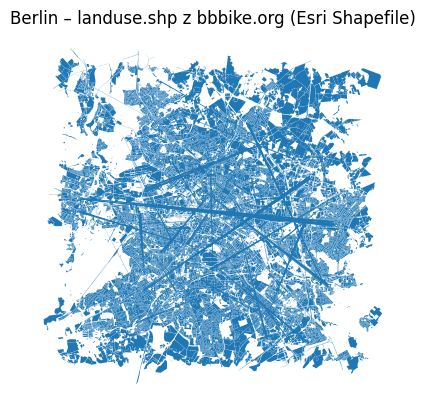


--- Souhrn provedených kroků ---
1) Připojen Google Disk a nastavena základní cesta: /content/drive/MyDrive/Colab Notebooks/Vis
2) Načten ZIP 'Berlin_bbbike_shp.zip' a rozbalen do složky 'Berlin_bbbike_extracted'.
3) Rekurzivně nalezeny všechny .shp soubory v rozbaleném adresáři.
4) Z nich byl podle názvu vybrán soubor 'landuse.shp'.
5) Soubor 'landuse.shp' byl načten do GeoDataFrame 'landuse'.
6) Zobrazen náhled dat (head), seznam sloupců a počet záznamů.
7) Z dat 'landuse' byla vykreslena mapa s velikostí (16, 12) a vypnutými osami (axis('off')).


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import os
import zipfile
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

# 1️⃣ Základní cesty
base_dir = "/content/drive/MyDrive/Colab Notebooks/Vis"
zip_filename = "Berlin_bbbike_shp.zip"   # případně UPRAV název podle svého ZIPu
zip_path = os.path.join(base_dir, zip_filename)
extract_dir = os.path.join(base_dir, "Berlin_bbbike_extracted")

print("Základní složka:", base_dir)
print("ZIP soubor    :", zip_path)
print("Cílová složka :", extract_dir)

# 2️⃣ Kontrola existence ZIPu a rozbalení
if not os.path.exists(zip_path):
    raise FileNotFoundError(
        f"ZIP soubor {zip_path} neexistuje. "
        "Zkontroluj název souboru nebo upload na Google Drive."
    )

os.makedirs(extract_dir, exist_ok=True)

print("\nRozbaluji ZIP do složky:", extract_dir)
with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)
print("Rozbaleno.\n")

# 3️⃣ Nalezení všech .shp souborů
shp_paths = glob.glob(os.path.join(extract_dir, "**", "*.shp"), recursive=True)

if not shp_paths:
    raise FileNotFoundError(
        "V rozbaleném ZIPu nebyly nalezeny žádné .shp soubory."
    )

print("Nalezené .shp soubory:")
for p in shp_paths:
    print(" -", os.path.relpath(p, extract_dir))

# 4️⃣ Výběr SOUBORU landuse.shp (podle názvu, ne podle sloupce)
landuse_shp = None
for p in shp_paths:
    if os.path.basename(p).lower().startswith("landuse"):
        landuse_shp = p
        break

if landuse_shp is None:
    raise FileNotFoundError(
        "V rozbaleném ZIPu nebyl nalezen soubor 'landuse.shp'. "
        "Zkontroluj export z bbbike.org."
    )

print("\nVybraný shapefile:")
print(" - cesta:", landuse_shp)

# 5️⃣ Načtení vybraného shapefilu do GeoDataFrame 'landuse'
landuse = gpd.read_file(landuse_shp)

print("\nPrvních 5 řádků GeoDataFrame landuse:")
display(landuse.head())

print("\nSeznam sloupců v landuse:")
print(landuse.columns.tolist())

print("\nPočet záznamů v landuse:", len(landuse))

# 6️⃣ Vykreslení mapy landuse
plt.figure(figsize=(16, 12))
ax = landuse.plot()
ax.axis("off")
plt.title("Berlin – landuse.shp z bbbike.org (Esri Shapefile)")
plt.show()

# 7️⃣ Souhrnný výpis 'co všechno bylo provedeno'
print("\n--- Souhrn provedených kroků ---")
print("1) Připojen Google Disk a nastavena základní cesta:", base_dir)
print(f"2) Načten ZIP '{zip_filename}' a rozbalen do složky 'Berlin_bbbike_extracted'.")
print("3) Rekurzivně nalezeny všechny .shp soubory v rozbaleném adresáři.")
print("4) Z nich byl podle názvu vybrán soubor 'landuse.shp'.")
print("5) Soubor 'landuse.shp' byl načten do GeoDataFrame 'landuse'.")
print("6) Zobrazen náhled dat (head), seznam sloupců a počet záznamů.")
print("7) Z dat 'landuse' byla vykreslena mapa s velikostí (16, 12) a vypnutými osami (axis('off')).")


TOP 10 hodnot ve sloupci 'type':
type
grass           18536
residential     12305
commercial       2028
allotments       1260
retail           1214
construction     1118
meadow            892
industrial        717
flowerbed         681
railway           578
Name: count, dtype: int64

Zvolených 7 nejčastějších typů: ['grass', 'residential', 'commercial', 'allotments', 'retail', 'construction', 'meadow']
Všechny ostatní typy jsou sloučeny do kategorie 'other'.


<Figure size 2000x2000 with 0 Axes>

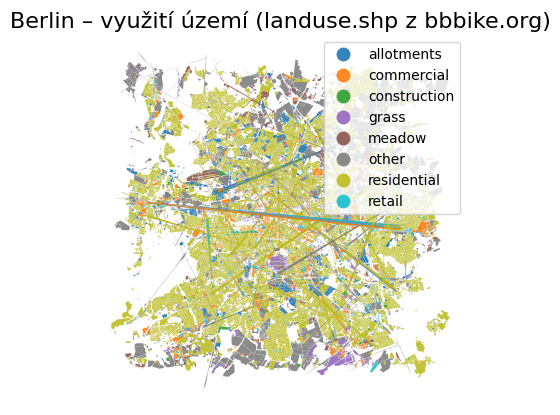


--- Co všechno bylo provedeno v této buňce ---
1) Z existujícího GeoDataFrame 'landuse' byl vypsán přehled TOP 10 hodnot ve sloupci 'type'.
2) Bylo vybráno 7 nejčastějších typů využití území; tyto typy byly ponechány samostatně,
   všechny ostatní typy byly sloučeny do kategorie 'other' ve sloupci 'type_simplified'.
3) Byl vytvořen nový GeoDataFrame 'landuse_plot' se sloupcem 'type_simplified'.
4) Byla vykreslena mapa Berlína s plochami barevně rozlišenými podle 'type_simplified',
   s legendou, velikostí obrázku (20, 20) a vypnutými osami.


In [7]:
import matplotlib.pyplot as plt

# 1️⃣ Přehled, jaké typy využití území v datech máme
print("TOP 10 hodnot ve sloupci 'type':")
print(landuse["type"].value_counts().head(10))

# 2️⃣ Vybereme několik nejčastějších typů a ostatní hodíme do 'other'
top_n = 7  # kolik typů chceme mít barevně rozlišených
top_types = landuse["type"].value_counts().head(top_n).index

landuse_plot = landuse.copy()
landuse_plot["type_simplified"] = landuse_plot["type"].where(
    landuse_plot["type"].isin(top_types),
    "other"
)

print(f"\nZvolených {top_n} nejčastějších typů:", list(top_types))
print("Všechny ostatní typy jsou sloučeny do kategorie 'other'.")

# 3️⃣ Vykreslení – větší obrázek, barvy podle type_simplified, legenda, bez os
plt.figure(figsize=(20, 20))
ax = landuse_plot.plot(
    column="type_simplified",
    categorical=True,
    legend=True,
    linewidth=0,        # tenké hrany (0 = žádná čára, rychlejší vykreslení)
    alpha=0.9,
    ax=None
)

ax.set_title("Berlin – využití území (landuse.shp z bbbike.org)", fontsize=16)
ax.axis("off")

plt.show()

# 4️⃣ Souhrn kroků v této buňce
print("\n--- Co všechno bylo provedeno v této buňce ---")
print("1) Z existujícího GeoDataFrame 'landuse' byl vypsán přehled TOP 10 hodnot ve sloupci 'type'.")
print(f"2) Bylo vybráno {top_n} nejčastějších typů využití území; tyto typy byly ponechány samostatně,")
print("   všechny ostatní typy byly sloučeny do kategorie 'other' ve sloupci 'type_simplified'.")
print("3) Byl vytvořen nový GeoDataFrame 'landuse_plot' se sloupcem 'type_simplified'.")
print("4) Byla vykreslena mapa Berlína s plochami barevně rozlišenými podle 'type_simplified',")
print("   s legendou, velikostí obrázku (20, 20) a vypnutými osami.")

In [8]:
# 💡 Předpoklad: GeoDataFrame `landuse` už existuje (načtený landuse.shp)

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1) Podíváme se, jaké typy máme a vybereme TOP N
top_n = 7
type_counts = landuse["type"].value_counts()
top_types = type_counts.head(top_n).index

print("TOP hodnoty ve sloupci 'type':")
print(type_counts.head(15))

# 2) Vytvoříme zjednodušený sloupec type_simplified
landuse_plot = landuse.copy()
landuse_plot["type_simplified"] = landuse_plot["type"].where(
    landuse_plot["type"].isin(top_types),
    "other"
)

print(f"\nPoužité kategorie (TOP {top_n} + 'other'):")
print(landuse_plot["type_simplified"].value_counts())

# 3) Nastavíme barvy pro jednotlivé typy
#    - klidně si je podle svého uprav :)
color_map = {
    "residential": "#ffe6a3",  # světle žlutá
    "forest":      "#4c8f4c",  # tmavší zelená
    "grass":       "#9bd66f",  # světle zelená
    "industrial":  "#c0c0c0",  # šedá
    "cemetery":    "#2f6f2f",  # tmavě zelená
    "railway":     "#ff9999",  # růžovo-červená
    "allotments":  "#7fbf7f",  # zahrádky
    "other":       "#dddddd",  # zbytek
}

# doplníme barvu i pro typy, které nejsou v color_map -> světle šedá
default_color = "#dddddd"

landuse_plot["color"] = landuse_plot["type_simplified"].map(
    lambda t: color_map.get(t, default_color)
)

# 4) Dropdown pro výběr typu
options = ["Všechno"] + sorted(landuse_plot["type_simplified"].unique())
dropdown = widgets.Dropdown(
    options=options,
    value="Všechno",
    description="Typ:",
)

def draw_map(selected_type):
    # vyčistíme výstup, ale necháme zobrazený dropdown
    clear_output(wait=True)
    display(dropdown)

    if selected_type == "Všechno":
        subset = landuse_plot
        title_add = " – všechny typy"
    else:
        subset = landuse_plot[landuse_plot["type_simplified"] == selected_type]
        title_add = f" – typ: {selected_type}"

    print(f"\nPočet polygonů v zobrazené vrstvě: {len(subset)}")

    plt.figure(figsize=(14, 14))
    ax = subset.plot(
        color=subset["color"],
        linewidth=0
    )
    ax.axis("off")
    ax.set_title("Berlin – využití území" + title_add, fontsize=16)
    plt.show()

    # souhrnný text k této volbě
    print("\n--- Co bylo provedeno v aktuálním zobrazení ---")
    print(f"- Vybrán typ: '{selected_type}'.")
    if selected_type == 'Všechno':
        print("- Zobrazeny všechny polygony z GeoDataFrame 'landuse_plot'.")
    else:
        print("- Filtrovány pouze záznamy se zjednodušeným typem "
              f"'{selected_type}' ve sloupci 'type_simplified'.")
    print("- Pro každý polygon byla použita barva z 'color_map'.")
    print("- Vykreslena mapa s velikostí (14, 14) a vypnutými osami (axis('off')).")

# 5) Propojíme dropdown s vykreslovací funkcí
widgets.interact(draw_map, selected_type=dropdown);


TOP hodnoty ve sloupci 'type':
type
grass           18536
residential     12305
commercial       2028
allotments       1260
retail           1214
construction     1118
meadow            892
industrial        717
flowerbed         681
railway           578
farmland          433
brownfield        298
religious         262
tree_pit          254
cemetery          242
Name: count, dtype: int64

Použité kategorie (TOP 7 + 'other'):
type_simplified
grass           18536
residential     12305
other            4464
commercial       2028
allotments       1260
retail           1214
construction     1118
meadow            892
Name: count, dtype: int64


interactive(children=(Dropdown(description='Typ:', options=('Všechno', 'allotments', 'commercial', 'constructi…

OpenStreetMap – cvičení 4

Z webových stránek bbbike.org exportujte prostorová data, která splňují následující kritéria:

data ve formátu Shapefile (Esri),

oblast mapy představující Paříž.

Tip: Je třeba pojmenovat exportovanou oblast a zadat svou e-mailovou adresu, na kterou obdržíte odkaz pro stažení souborů Shapefile.

Extrahujte stažený soubor ve formátu .zip z poznámkového bloku pomocí knihovny zipfile:

import zipfile
with zipfile.ZipFile("your_zip_path/your_zip_name.zip","r") as zip_ref:
    zip_ref.extractall("your_directory")


Nainstalujte a importujte v poznámkovém bloku knihovnu geopandas.

Načtěte data ze .shp souboru s daty o silnicích do proměnné roads.

Zobrazte datový rámec roads. Přepište proměnnou roads tak, aby obsahovala pouze silnice s nejvyšší dovolenou rychlostí odlišnou od 30 km/h.

Vytvořte prostorový graf z dat v proměnné roads.

Nastavte velikost obrázku na (16, 12) a barvu na #7C90A3. Osy vypněte pomocí metody .axis('off').